In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading data
df = pd.read_csv('../data/exoTest.csv')

# 2. Look at the first few rows
print(df.head())

# 3. Check the shape (How many stars vs how many light readings)
print(f"Dataset shape: {df.shape}")

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0      2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1      2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2      2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3      2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4      2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   

    FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0     6.98     6.63  ...      14.52      19.29      14.44      -1.62   
1  5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
2   362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
3  -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
4   -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      13.33      45.50      31.93      35.78 

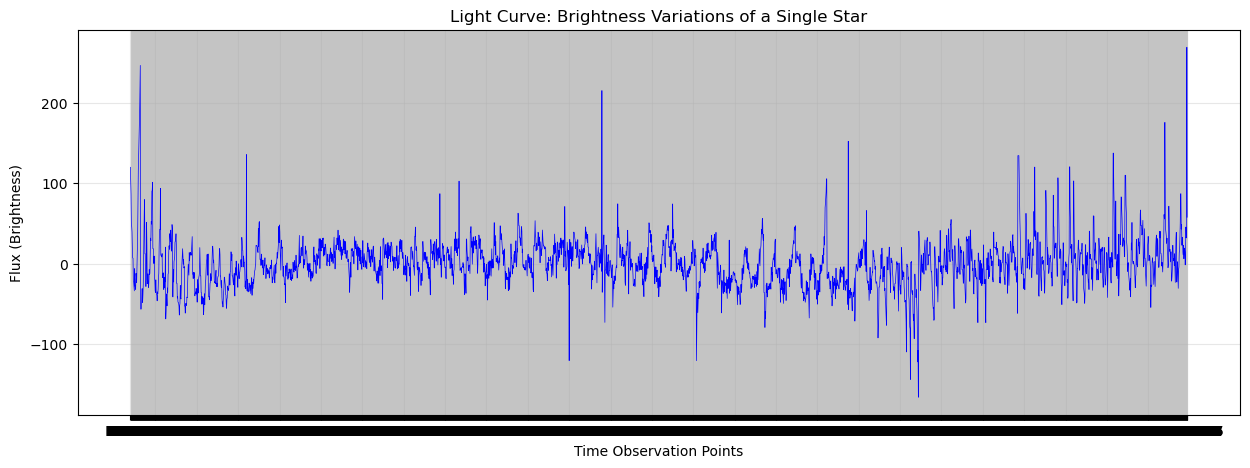

In [4]:
import matplotlib.pyplot as plt

# We pick star index 0 (the first row)
# df.iloc[0, 1:] means: take row 0, and all columns from index 1 to the end
star_data = df.iloc[0, 1:]

plt.figure(figsize=(15, 5))
plt.plot(star_data, color='blue', linewidth=0.5)
plt.title("Light Curve: Brightness Variations of a Single Star")
plt.xlabel("Time Observation Points")
plt.ylabel("Flux (Brightness)")
plt.grid(True, alpha=0.3)
plt.show()

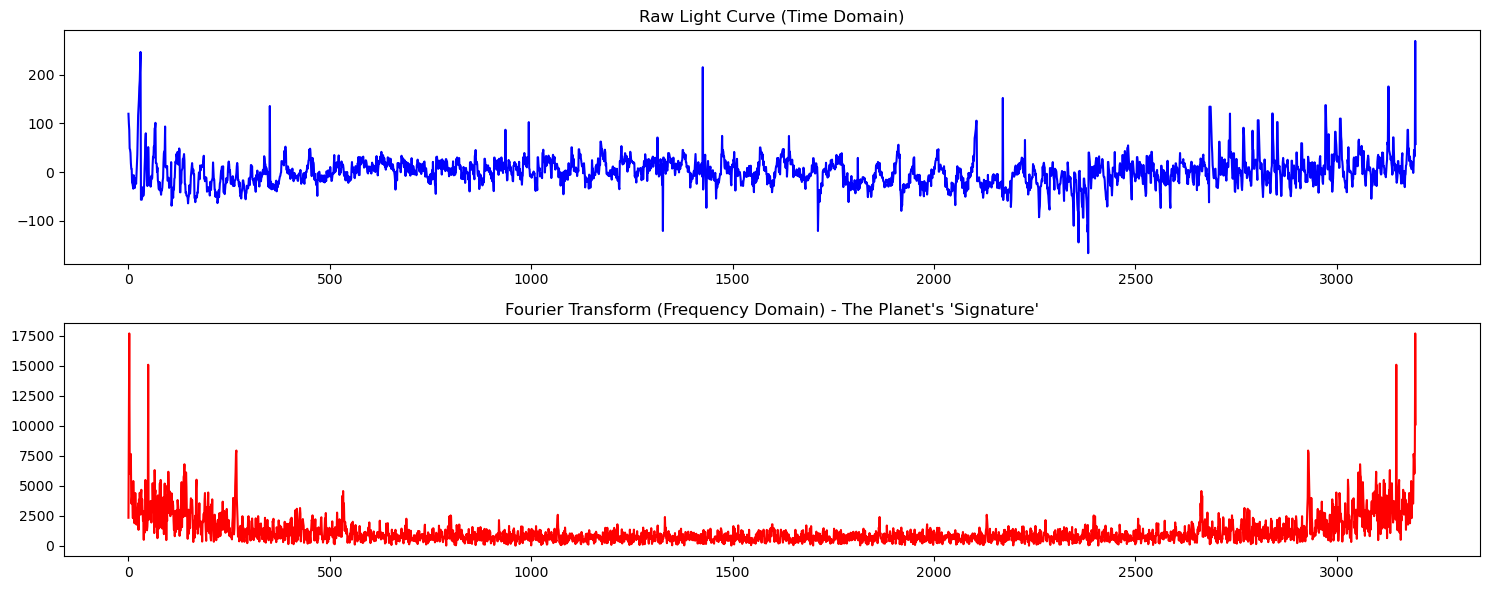

Model Training Complete!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. LOAD DATA
# Using your file name 'exoTest.csv'
df = pd.read_csv('../data/exoTest.csv')

# 2. SEPARATE LABELS AND FEATURES
# Label 2 = Exoplanet, Label 1 = No Planet
X = df.iloc[:, 1:].values  # The light flux
y = df.iloc[:, 0].values   # The labels

# 3. PHYSICS STEP: FAST FOURIER TRANSFORM (FFT)
# This converts "Time" data into "Frequency" data to find periodic orbits
def apply_fft(data):
    # We take the absolute value of the FFT to get the 'magnitude' of frequencies
    return np.abs(fft(data, axis=1))

X_fft = apply_fft(X)

# 4. VISUALIZATION (Comparison)
plt.figure(figsize=(15, 6))

# Plot Raw Light Curve
plt.subplot(2, 1, 1)
plt.plot(X[0, :], color='blue')
plt.title("Raw Light Curve (Time Domain)")

# Plot Fourier Transform
plt.subplot(2, 1, 2)
plt.plot(X_fft[0, :], color='red')
plt.title("Fourier Transform (Frequency Domain) - The Planet's 'Signature'")

plt.tight_layout()
plt.show()

# 5. MACHINE LEARNING (Random Forest)
# We use a smaller forest to start
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_fft, y) # Teaching the model using the FFT data

print("Model Training Complete!")

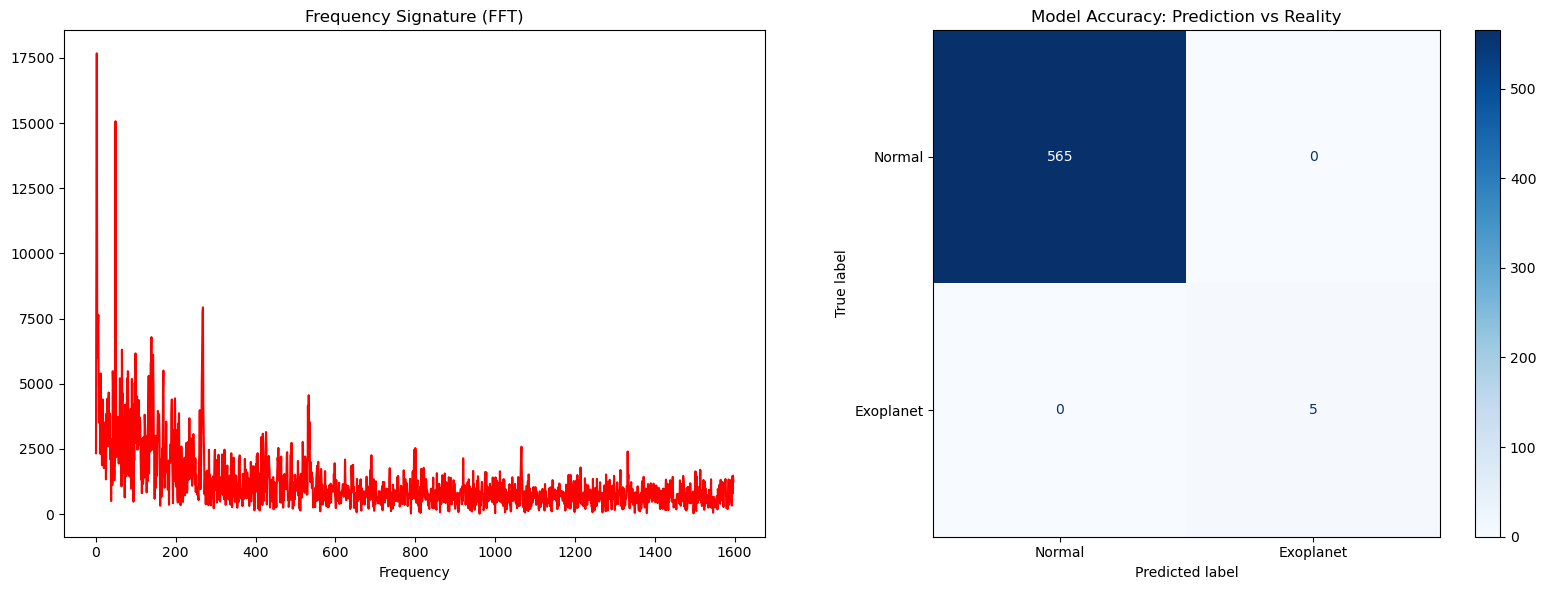

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. LOAD DATA (Using your file name)
df = pd.read_csv('../data/exoTest.csv')
X = df.iloc[:, 1:].values  
y = df.iloc[:, 0].values   

# 2. PHYSICS STEP: FFT
# Converting time-series brightness into frequency signatures
X_fft = np.abs(fft(X, axis=1))
# We only need the first half of the FFT (the meaningful frequencies)
X_fft = X_fft[:, :X_fft.shape[1]//2]

# 3. TRAIN THE MODEL
# Using 100 decision trees to classify the star signals
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_fft, y)

# 4. EVALUATION (The Confusion Matrix)
# This creates a "Grade Sheet" for the machine
y_pred = model.predict(X_fft)
cm = confusion_matrix(y, y_pred)

# 5. VISUALIZE RESULTS
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Fourier Transform of the first star
ax[0].plot(X_fft[0, :], color='red')
ax[0].set_title("Frequency Signature (FFT)")
ax[0].set_xlabel("Frequency")

# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Exoplanet"])
disp.plot(ax=ax[1], cmap='Blues')
ax[1].set_title("Model Accuracy: Prediction vs Reality")

plt.tight_layout()
plt.show()

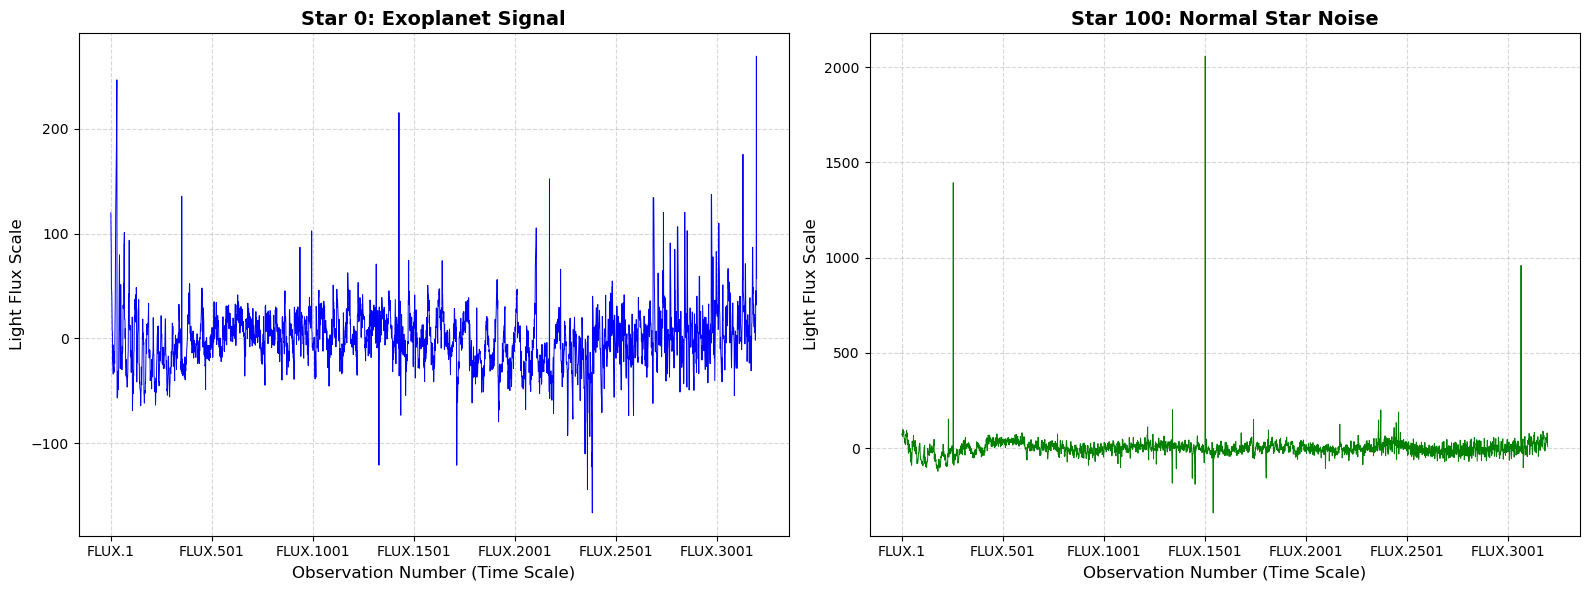

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- STAR 0 (EXOPLANET) ---
ax[0].plot(df.iloc[0, 1:], color='blue', linewidth=0.7)
ax[0].set_title("Star 0: Exoplanet Signal", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Observation Number (Time Scale)", fontsize=12)
ax[0].set_ylabel("Light Flux Scale", fontsize=12)

# This line forces the numbers 0, 500, 1000, etc., to show up clearly
ax[0].set_xticks(np.arange(0, 3500, 500)) 
ax[0].grid(True, which='both', linestyle='--', alpha=0.5)

# --- STAR 100 (NORMAL) ---
ax[1].plot(df.iloc[100, 1:], color='green', linewidth=0.7)
ax[1].set_title("Star 100: Normal Star Noise", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Observation Number (Time Scale)", fontsize=12)
ax[1].set_ylabel("Light Flux Scale", fontsize=12)

# This line forces the numbers to show up on the second graph too
ax[1].set_xticks(np.arange(0, 3500, 500))
ax[1].grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()